# Part B Testing

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pandas.read_csv('bankTransactions_rfm.csv')
originalDF = pandas.read_csv('bank_transactions_cleaned.csv')

In [2]:
# adding customer location into rfm df

merged_df = pandas.merge(df, originalDF[['CustomerID', 'CustLocation']], on='CustomerID', how='left')
merged_df.head()

,CustomerID,Recency,Frequency,Monetary,CustLocation
0,C1010011,75,2,4750.0,NOIDA
1,C1010011,75,2,4750.0,NEW DELHI
2,C1010012,118,1,1499.0,MUMBAI
3,C1010014,155,2,1205.0,MUMBAI
4,C1010014,155,2,1205.0,MUMBAI


In [3]:
# create seperate rfm model of top 5 locations.

toplocations = originalDF['CustLocation'].value_counts().head()

topLocationsRFM = merged_df[merged_df['CustLocation'].isin(toplocations.index)]
topLocationsRFM.head()

,CustomerID,Recency,Frequency,Monetary,CustLocation
1,C1010011,75,2,4750.0,NEW DELHI
2,C1010012,118,1,1499.0,MUMBAI
3,C1010014,155,2,1205.0,MUMBAI
4,C1010014,155,2,1205.0,MUMBAI
7,C1010028,103,1,557.0,DELHI


Text(0, 0.5, 'Count')

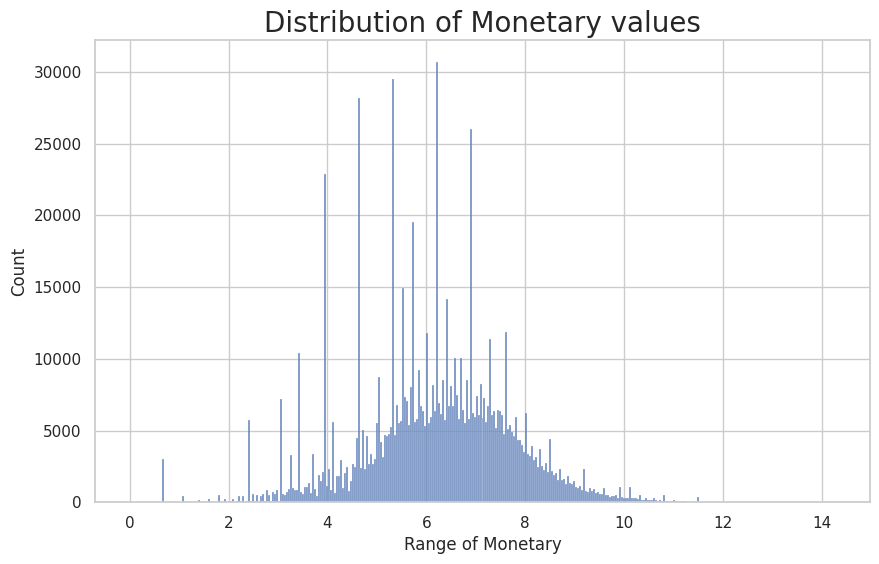

In [4]:
# Distribution of monetary values after first log transforming them FROM ORIGINAL CLEANED TRANSACTIONS RFM

monetary = numpy.log1p(df['Monetary'])

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(monetary)
plt.title('Distribution of Monetary values', fontsize = 20)
plt.xlabel('Range of Monetary')
plt.ylabel('Count')

Text(0, 0.5, 'Value')

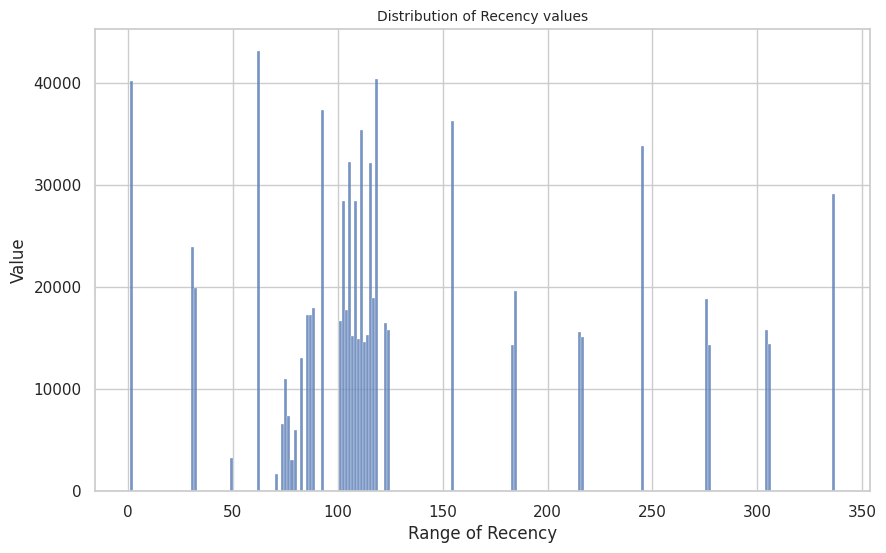

In [5]:
# Distribution of recency values FROM ORIGINAL CLEANED TRANSACTIONS RFM

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(df['Recency'])
plt.title('Distribution of Recency values', fontsize = 10)
plt.xlabel('Range of Recency')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

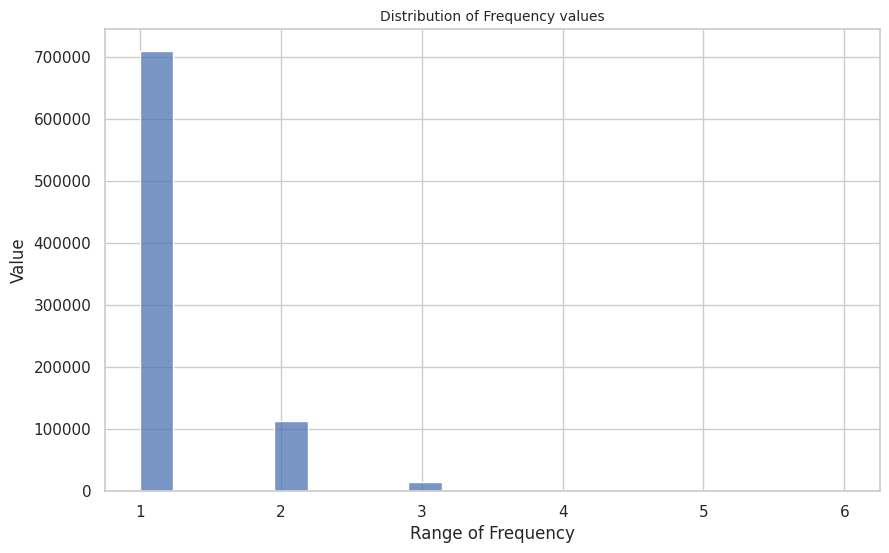

In [6]:
# distribution of frequency values FROM ORIGINAL CLEANED TRANSACTIONS RFM

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.histplot(df['Frequency'])
plt.title('Distribution of Frequency values', fontsize = 10)
plt.xlabel('Range of Frequency')
plt.ylabel('Value')

# Preparation for C.1
create distributions for rfm by location

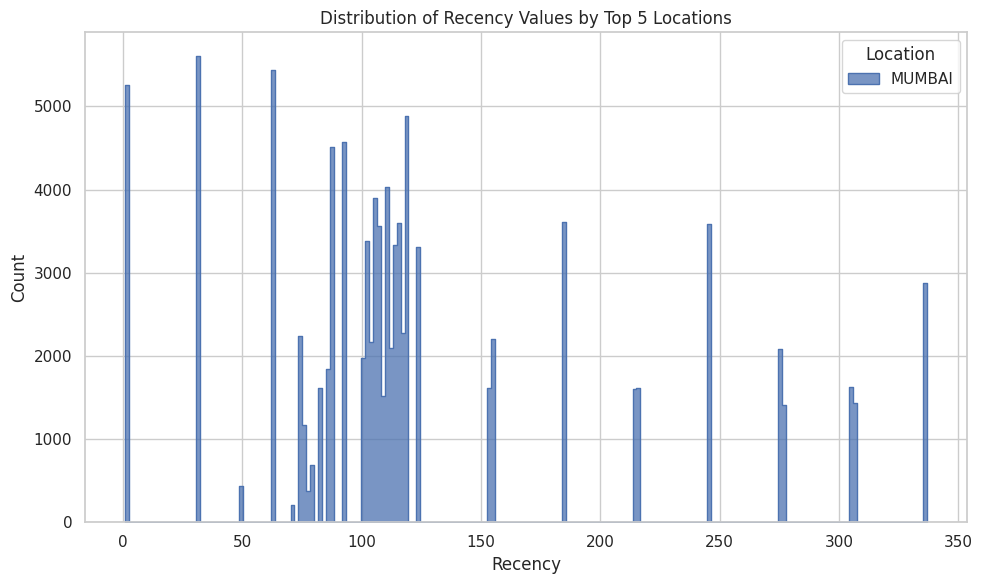

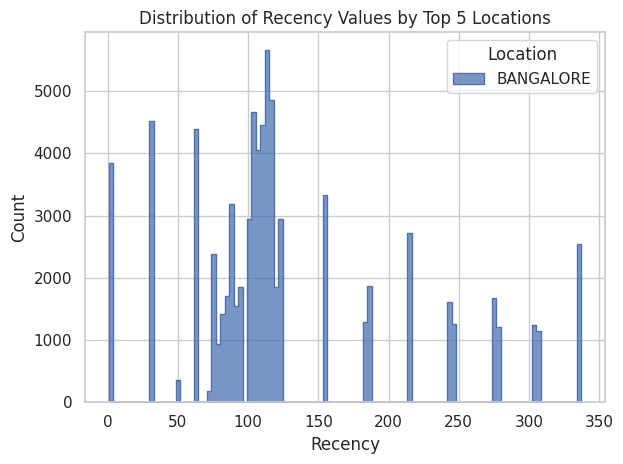

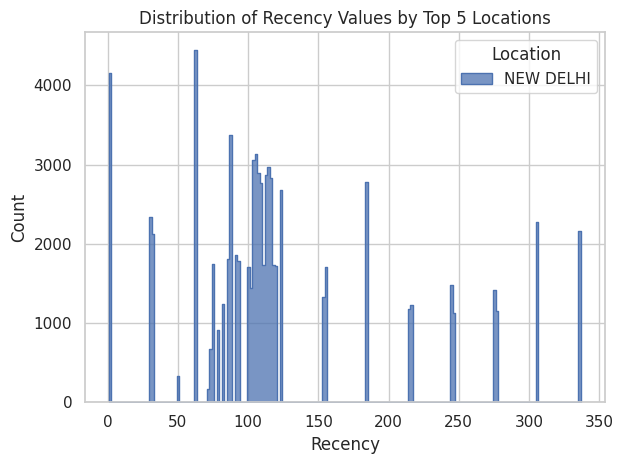

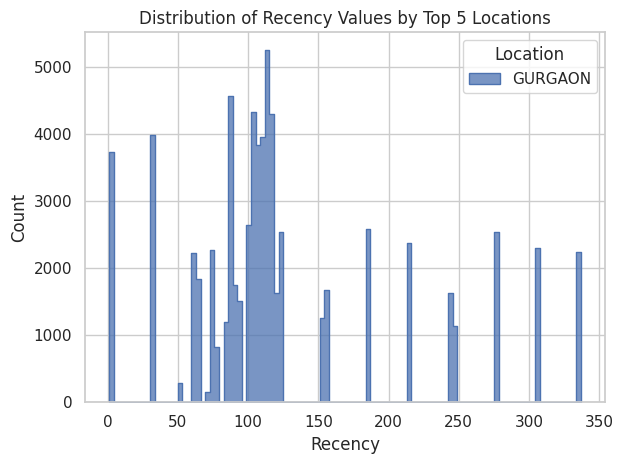

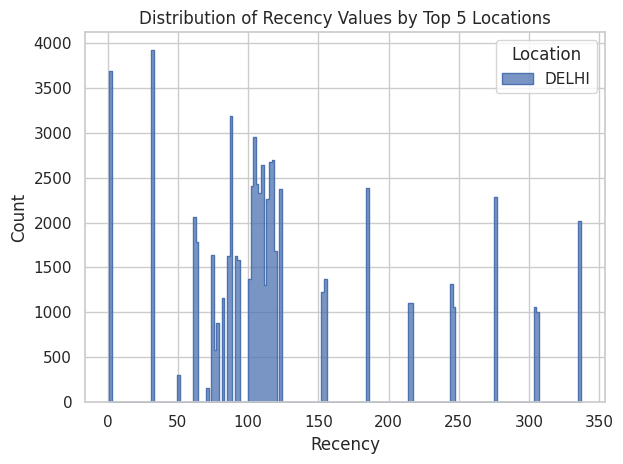

In [7]:
# recency

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

tl = toplocations.index.tolist()

for location in tl:
    sns.histplot(
        data=topLocationsRFM[topLocationsRFM['CustLocation'] == location],
        x='Recency',
        label=location,
        element='step',
        stat='count',
        common_norm=False
    )
    plt.title('Distribution of Recency Values by Top 5 Locations', fontsize=12)
    plt.xlabel('Recency')
    plt.ylabel('Count')
    plt.legend(title='Location')
    plt.tight_layout()
    plt.show()

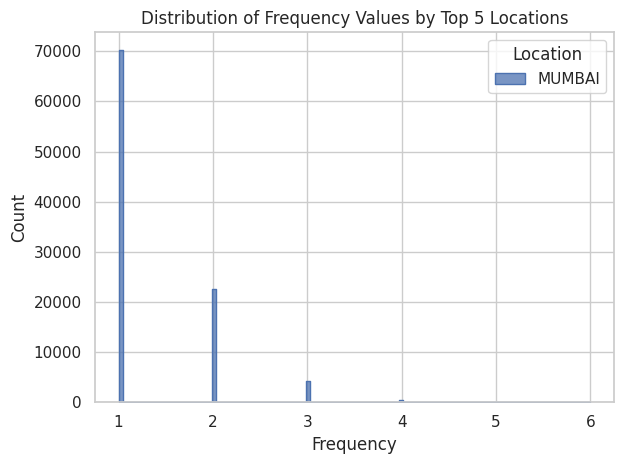

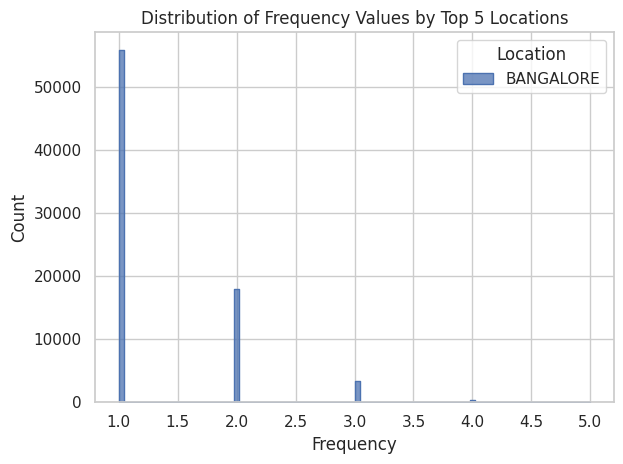

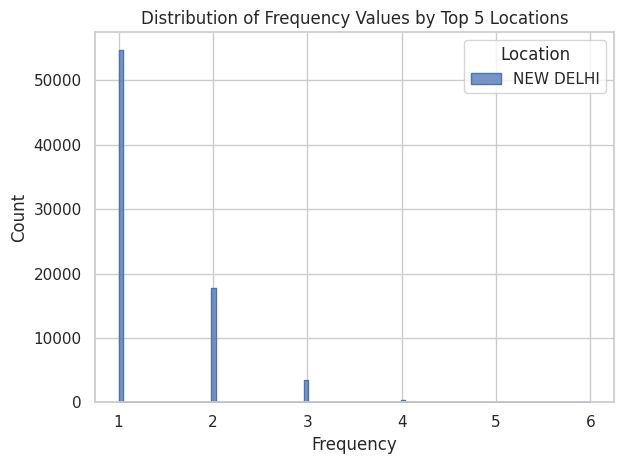

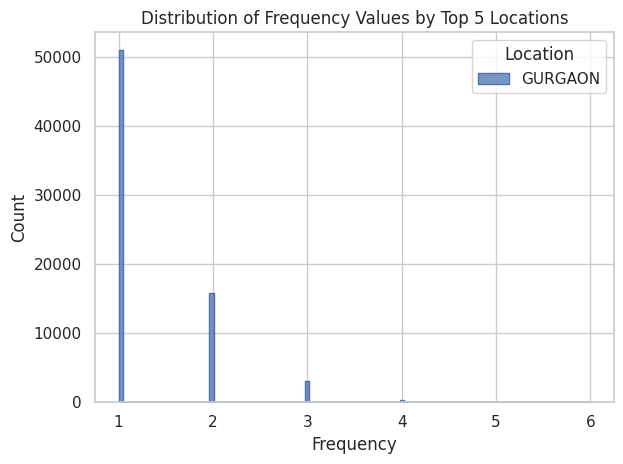

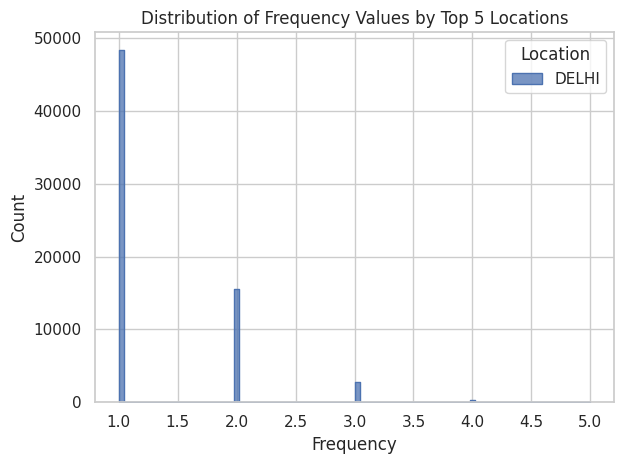

In [8]:
# frequency

for location in tl:
    sns.histplot(
        data=topLocationsRFM[topLocationsRFM['CustLocation'] == location],
        x='Frequency',
        label=location,
        element='step',
        stat='count',
        common_norm=False
    )
    plt.title('Distribution of Frequency Values by Top 5 Locations', fontsize=12)
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.legend(title='Location')
    plt.tight_layout()
    plt.show()

In [9]:
loggedMonetary = topLocationsRFM.copy()
loggedMonetary['Monetary'] = numpy.log1p(loggedMonetary['Monetary'])

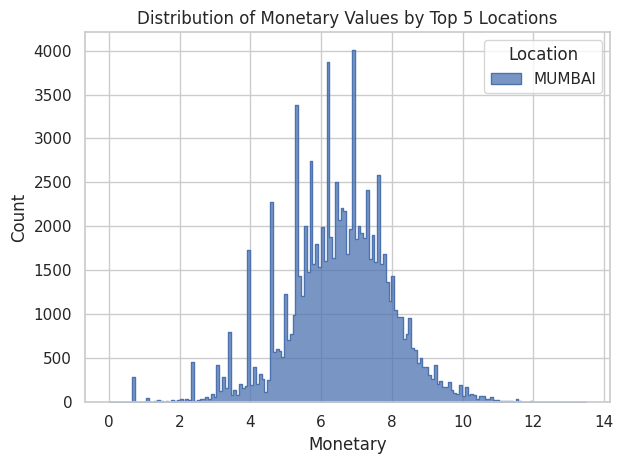

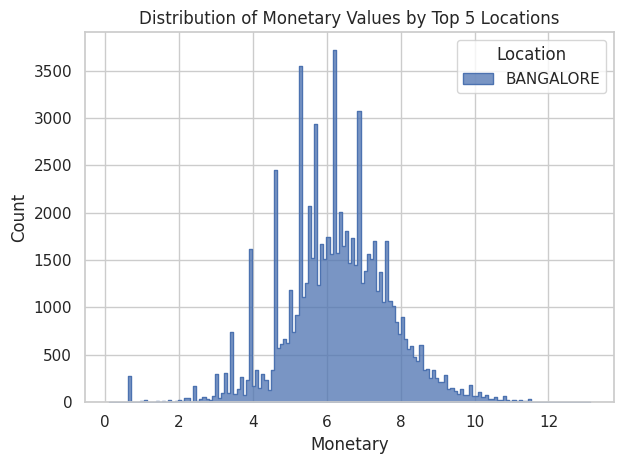

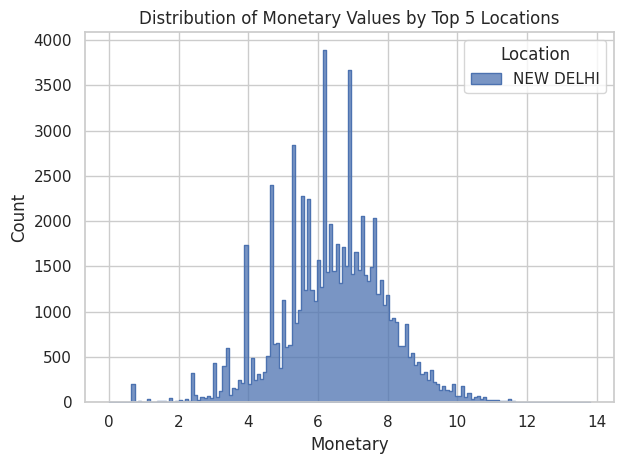

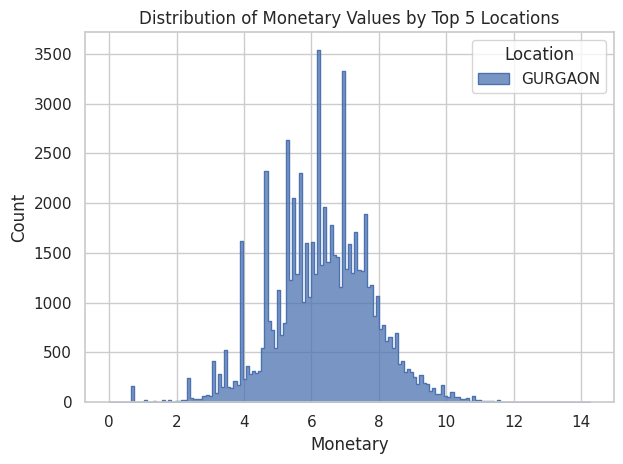

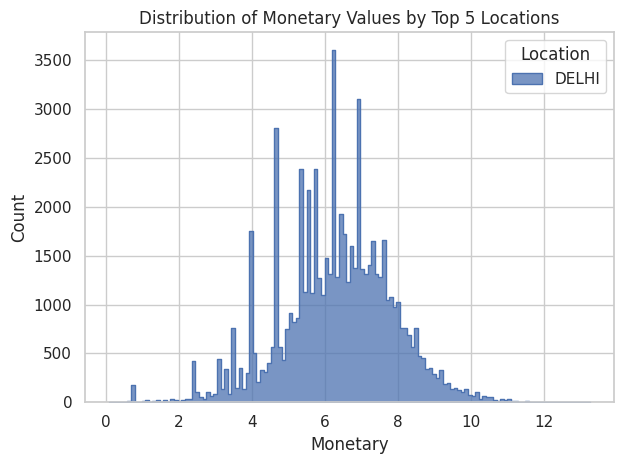

In [10]:
# monetary

for location in tl:
    sns.histplot(
        data=loggedMonetary[loggedMonetary['CustLocation'] == location],
        x='Monetary',
        label=location,
        element='step',
        stat='count',
        common_norm=False
    )
    plt.title('Distribution of Monetary Values by Top 5 Locations', fontsize=12)
    plt.xlabel('Monetary')
    plt.ylabel('Count')
    plt.legend(title='Location')
    plt.tight_layout()
    plt.show()

In [11]:
# create csv by top locations

for location in tl:
    topLocationsRFM[topLocationsRFM['CustLocation'] == location].to_csv(f'rfm_{location}.csv', index=False)

# Determining Cluster Number

**B.1**

In terms of business intelligence, KMeans clustering is simple, fast and easily interpretable, making it perfect for forming business context. Customer segmentation is the classic use-case of KMeans which makes it an appropriate clustering algorithm for analysing the bank transactions customer data, especially considering the data has already been analysed based on RFM brackets which means the data has been standardised with normal distribution; all expected parameters for KMeans clustering. The frequency granularity, however, is very low with values ranging between 1-6. This, coupled with the skewness of customers only making 1 transaction, means that the data violates the normalised assumption of KMeans. To mitigate this, the frequency values could either be log transformed or binned and encoded to give the clustering model more semantic structure.

**B.2**

The value of K (the number of clusters) is most appropriate where the Within Cluster Sum of Squared Errors (WCSS) starts to diminish. This is visualised through the elbow graph; the x axis represents the Number of Clusters (K) and the y axis represents the WCSS (Within-Cluster Sum of Squares). We can identify the appropriate K from the elbow joint point which is determined as the point at which the value of WCSS stops decreasing. For our data, this point is determined as 4 as beyond this point the drop is minimal so K = 4. This elbow graph indicates that 4 is the optimum number of clusters for customer segmentation as it offers the best trade-off between compactness and simplicity.

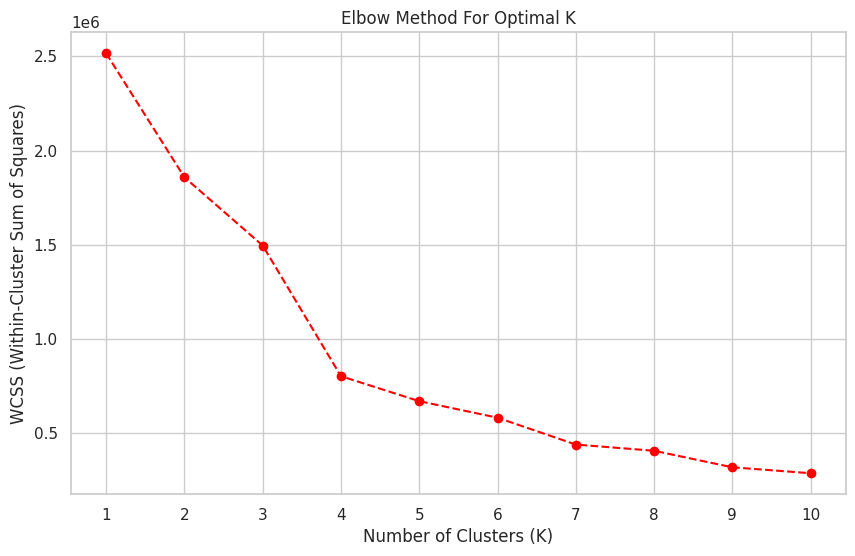

In [12]:
data = df[["Recency", "Frequency", "Monetary"]]

# scaling the data because of the serious descrepency between frequency and monetary
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

# elbow method
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaledData)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

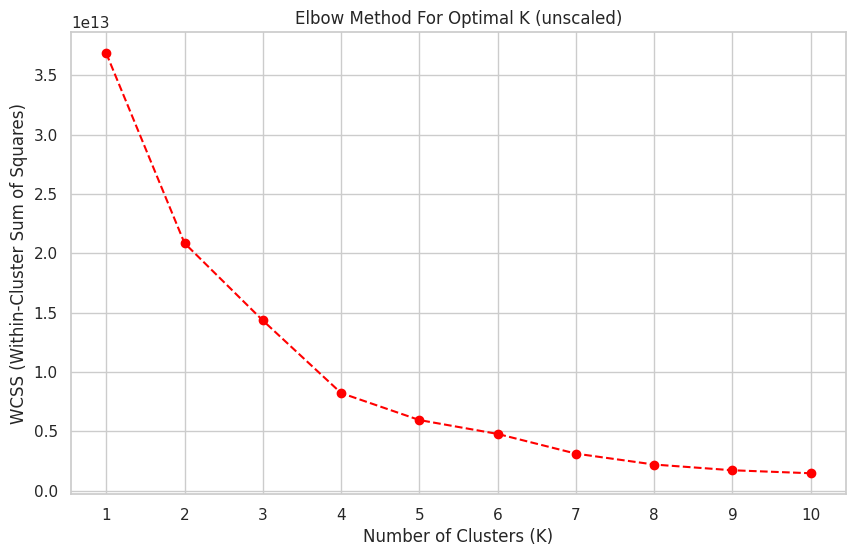

In [13]:
# elbow method with original data (unscaled)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title("Elbow Method For Optimal K (unscaled)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [14]:
# implementing kmeans with 4 clusters as calculated above
km=KMeans(n_clusters=4)
km.fit(data)
clusters=km.predict(data)
data["Clusters"] = clusters
data.head()

,Recency,Frequency,Monetary,Clusters
0,75,2,4750.0,0
1,118,1,1499.0,0
2,155,2,1205.0,0
3,86,1,30.0,0
4,114,1,5000.0,0


In [15]:
# cluster sizes
clustSize = data.groupby('Clusters').size().to_frame()
clustSize.columns = ["KMeans_size"]
clustSize

,KMeans_size
Clusters,
0,816372
1,31
2,2219
3,19939


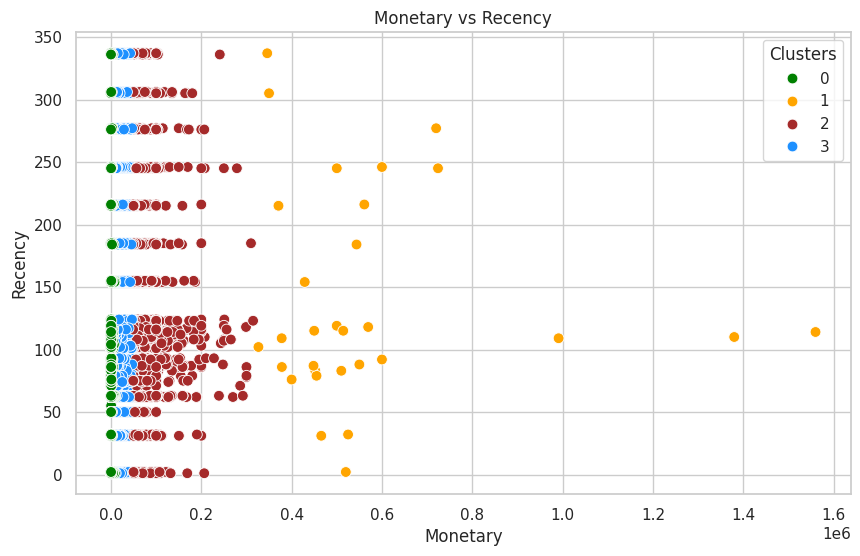

In [16]:
# 2D scatterplot showing monetary against recency for all locations
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Monetary',y = 'Recency',hue="Clusters",
palette=['green','orange','brown','dodgerblue'], legend='full',data = data ,s = 60 )
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.title('Monetary vs Recency')
plt.show()

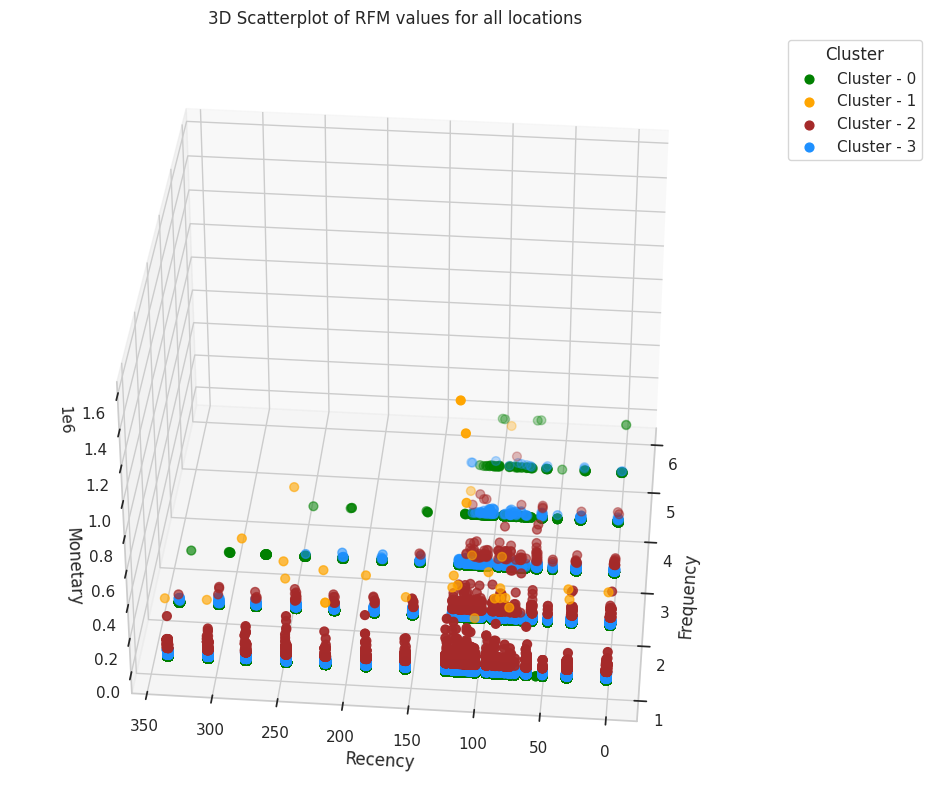

In [17]:
# 3D scatterplot of RFM values for all locations

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Frequency[data.Clusters == 0], data["Recency"][data.Clusters == 0], data["Monetary"][data.Clusters == 0], c='green', s=40, label='Cluster - 0')
ax.scatter(data.Frequency[data.Clusters == 1], data["Recency"][data.Clusters == 1], data["Monetary"][data.Clusters == 1], c='orange', s=40, label='Cluster - 1')
ax.scatter(data.Frequency[data.Clusters == 2], data["Recency"][data.Clusters == 2], data["Monetary"][data.Clusters == 2], c='brown', s=40,label='Cluster - 2')
ax.scatter(data.Frequency[data.Clusters == 3], data["Recency"][data.Clusters == 3], data["Monetary"][data.Clusters == 3], c='dodgerblue', s=40, label='Cluster - 3')
ax.view_init(35, 185)
plt.title("3D Scatterplot of RFM values for all locations")
plt.xlabel("Frequency")
plt.ylabel("Recency")
ax.set_zlabel('Monetary')
ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

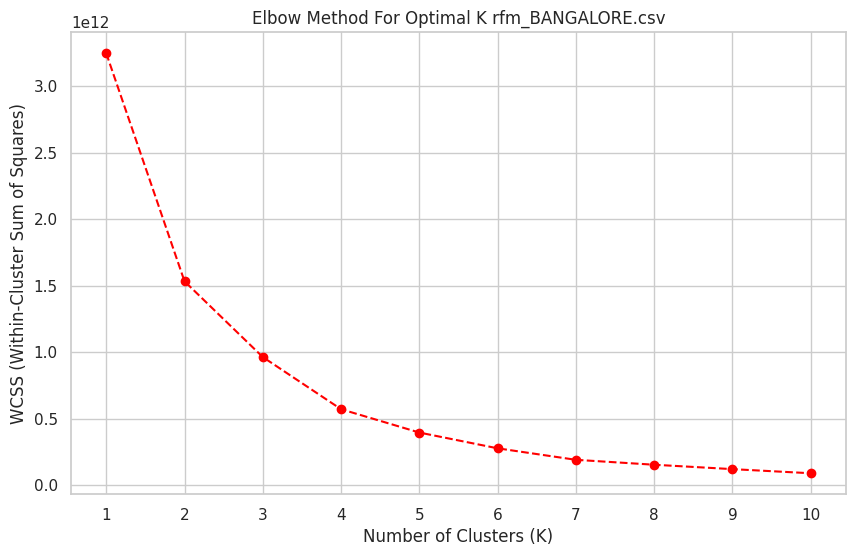

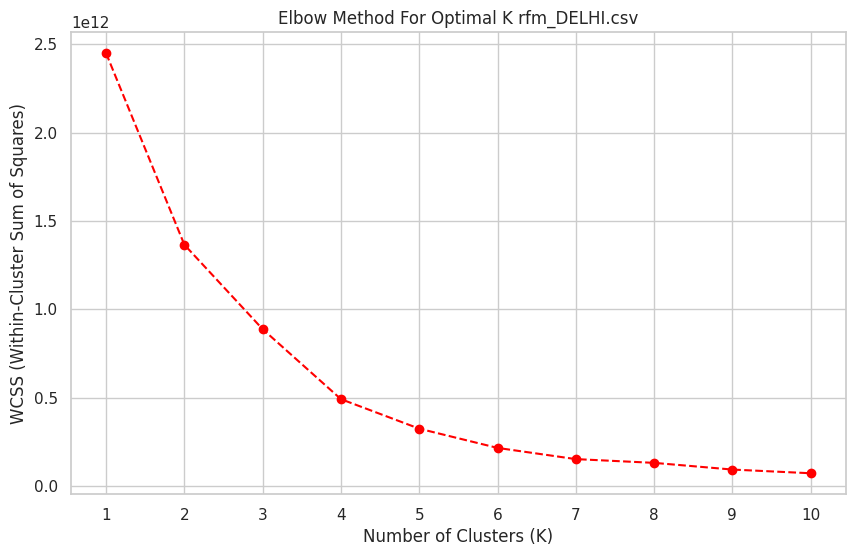

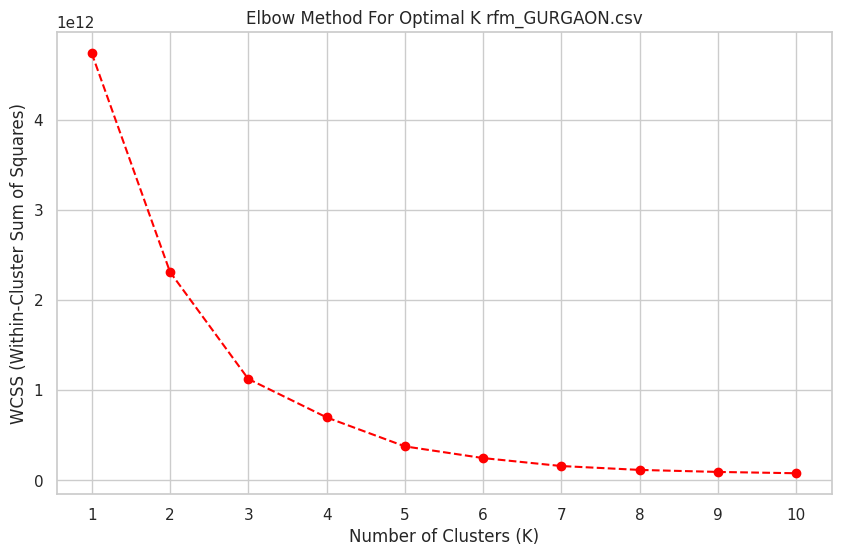

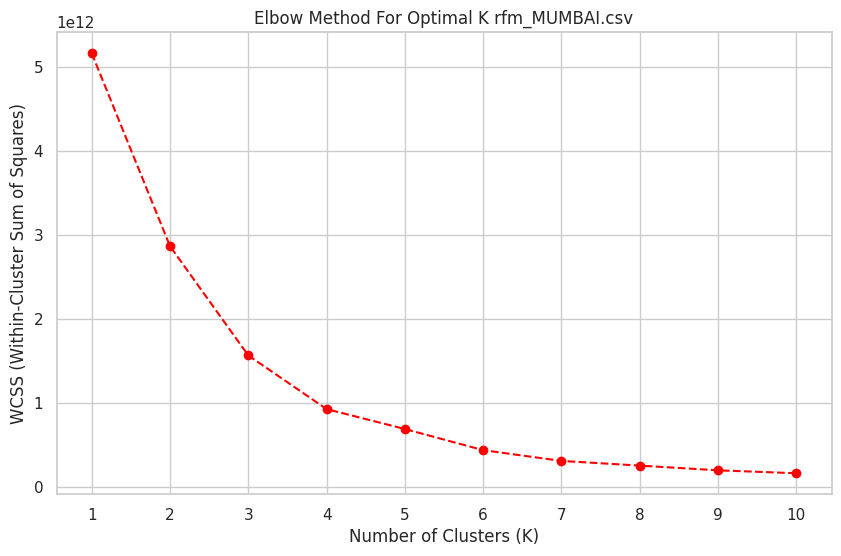

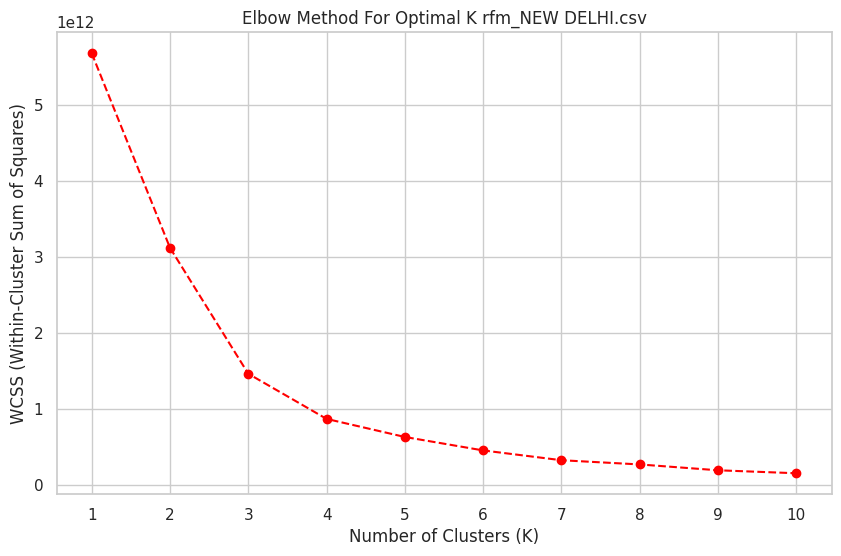

In [18]:
# elbow method for individual locations
locationCSV = ['rfm_BANGALORE.csv', 'rfm_DELHI.csv', 'rfm_GURGAON.csv', 'rfm_MUMBAI.csv', 'rfm_NEW DELHI.csv']
for loc in locationCSV:
  data = pandas.read_csv(loc)[["Recency", "Frequency", "Monetary"]]
  wcss = []

  for i in range(1, 11):
      kmeans = KMeans(n_clusters=i, random_state=42)
      kmeans.fit(data)
      wcss.append(kmeans.inertia_)

  plt.figure(figsize=(10, 6))
  plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
  plt.title(f"Elbow Method For Optimal K {loc}")
  plt.xlabel("Number of Clusters (K)")
  plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
  plt.xticks(range(1, 11))
  plt.grid(True)
  plt.show()

In [19]:
location_data = {}  # dictionary to hold location dfs

# kmeans calculation per location adding to location dictionary
for loc in locationCSV:
  if loc != 'rfm_GURGAON.csv':
    location_data[loc] = pandas.read_csv(loc)[["Recency", "Frequency", "Monetary"]]
    km = KMeans(n_clusters=4)
    km.fit(location_data[loc])
    clusters = km.predict(location_data[loc])
    location_data[loc]["Clusters"] = clusters
  else:
    location_data[loc] = pandas.read_csv(loc)[["Recency", "Frequency", "Monetary"]]
    km = KMeans(n_clusters=3)
    km.fit(location_data[loc])
    clusters = km.predict(location_data[loc])
    location_data[loc]["Clusters"] = clusters

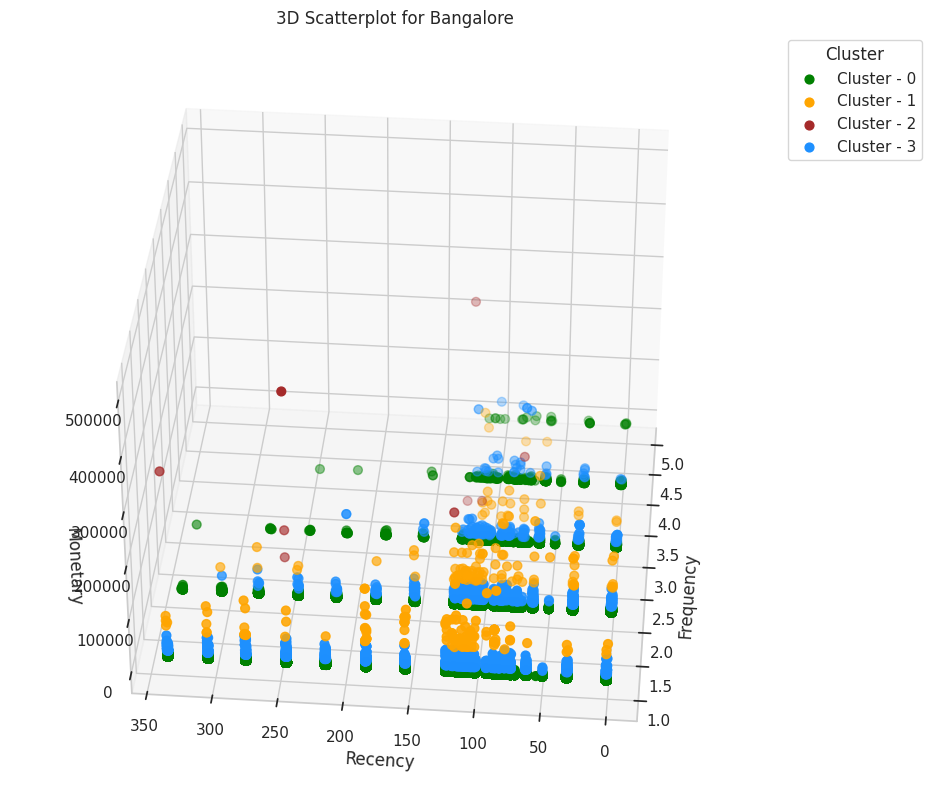

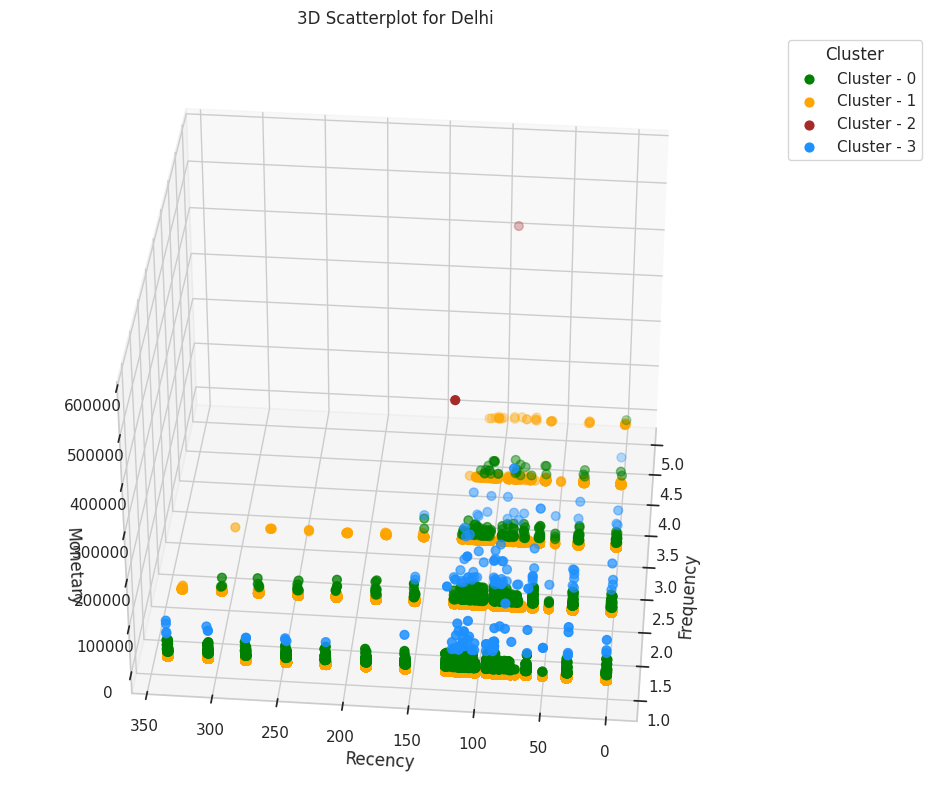

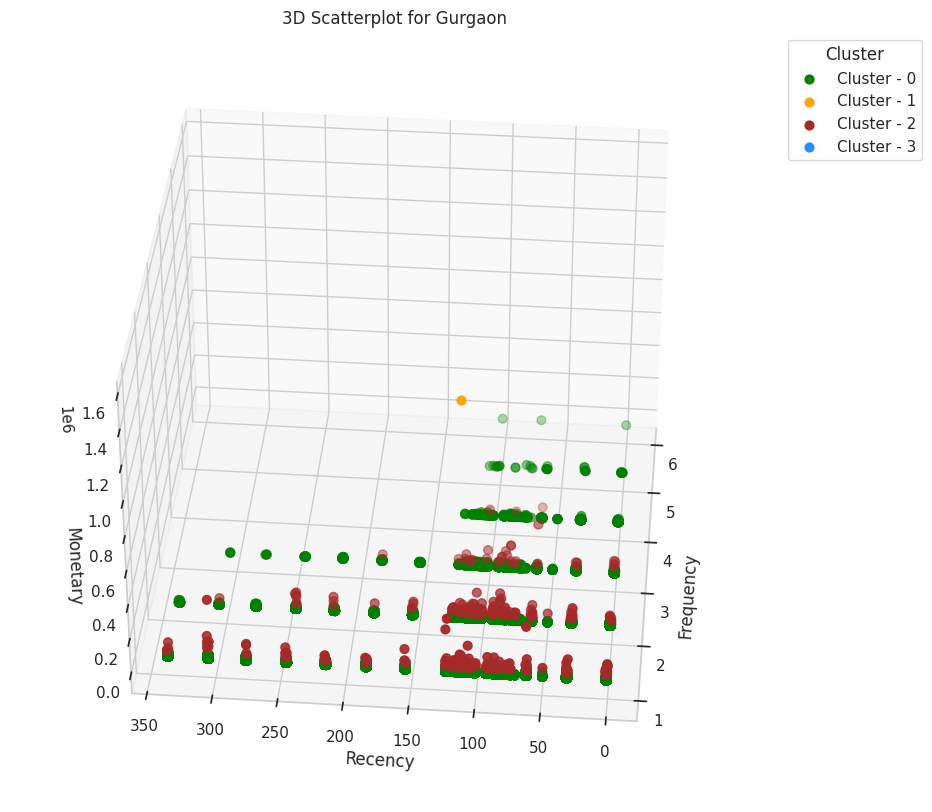

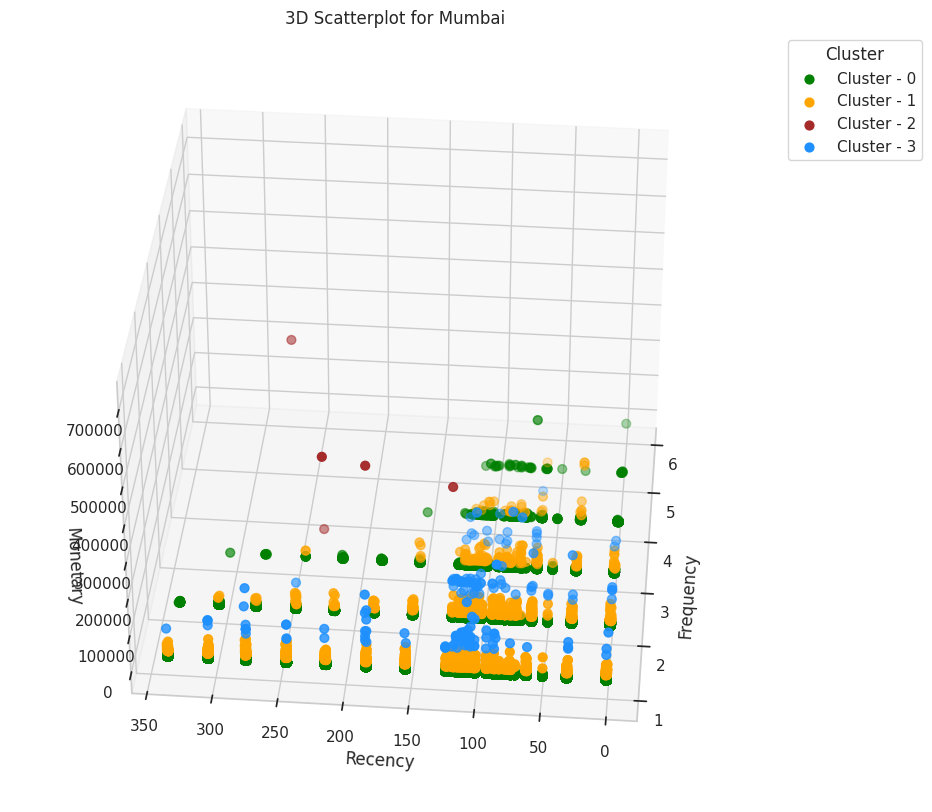

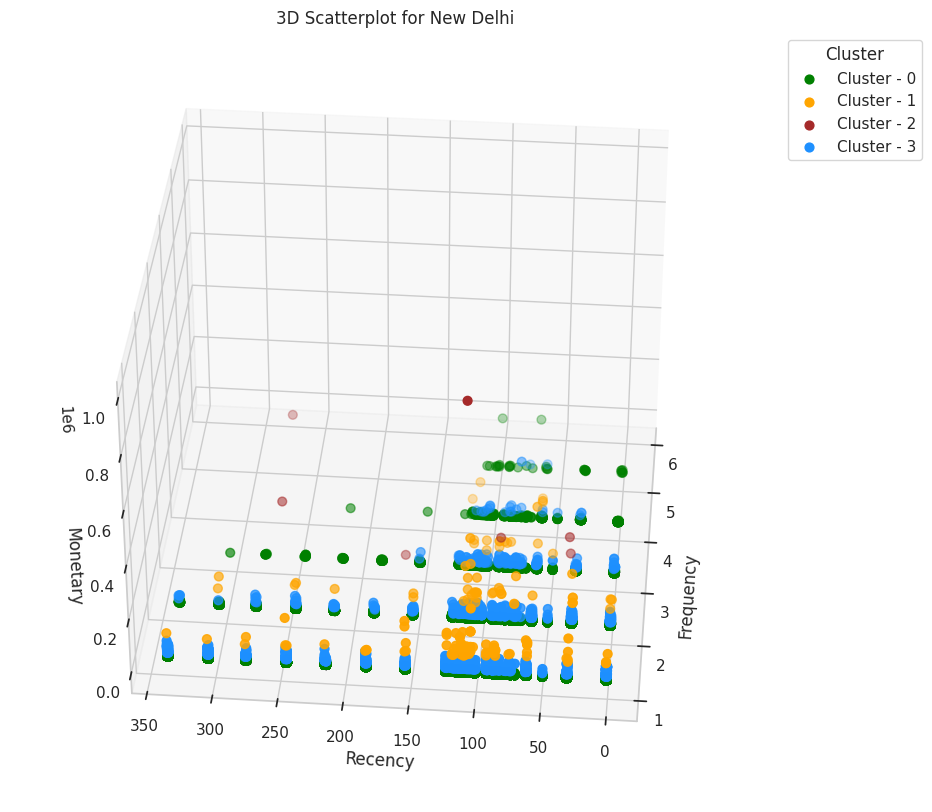

In [20]:
# 3D scatterplot for individual locations.

# dictionary of names and location data frames as dfs no longer contain location name
kmeansLocation = {
    'Bangalore': location_data['rfm_BANGALORE.csv'],
    'Delhi': location_data['rfm_DELHI.csv'],
    'Gurgaon': location_data['rfm_GURGAON.csv'],
    'Mumbai': location_data['rfm_MUMBAI.csv'],
    'New Delhi': location_data['rfm_NEW DELHI.csv']
}



for name, loc in kmeansLocation.items():
  data = loc
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data.Frequency[data.Clusters == 0], data["Recency"][data.Clusters == 0], data["Monetary"][data.Clusters == 0], c='green', s=40, label='Cluster - 0')
  ax.scatter(data.Frequency[data.Clusters == 1], data["Recency"][data.Clusters == 1], data["Monetary"][data.Clusters == 1], c='orange', s=40, label='Cluster - 1')
  ax.scatter(data.Frequency[data.Clusters == 2], data["Recency"][data.Clusters == 2], data["Monetary"][data.Clusters == 2], c='brown', s=40,label='Cluster - 2')
  ax.scatter(data.Frequency[data.Clusters == 3], data["Recency"][data.Clusters == 3], data["Monetary"][data.Clusters == 3], c='dodgerblue', s=40, label='Cluster - 3')
  ax.view_init(35, 185)
  plt.title(f"3D Scatterplot for {name}")
  plt.xlabel("Frequency")
  plt.ylabel("Recency")
  ax.set_zlabel('Monetary')
  ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1, 1))
  plt.show()